# One Figure Project #01

## About the project

### Author

#### Emanuel Arnaud Neves

Graduating in Statistics at Universidade Federal do Rio Grande do Norte (UFRN). Technical in Computing by the Instituto Federal de Educação, Ciência e Tecnologia do Rio Grande do Norte (IFRN). Student at Programa Talento Metrópole no IMD/UFRN. Student in Programa de Educação Tutorial (PET) - Statistics by the UFRN.

### Activity

This activity was solicited to the course of Data Science I at the Instituto Metrópole Digital, part of the Universidade Federal do Rio Grande do Norte, in Natal, Brazil.
Recreate the [image used by Financial Times](https://www.ft.com/content/272354f2-f970-4ae4-a8ae-848c4baf8f4a), with data from Google Mobility Report, adapted to a chosen context.

#### Objective

Practice the initial knowledge about Data Science in a recent application, stimulating creativity and creating a professional portfolio.

#### Methods

In this project we will see the social mobility in the brazilian cities of Natal and Belém and compare one to another and to the other capitals of the brazilian states. For this purpose, the moving average will be used.

## Solving

### Setting the environment

The packages used in this code are pandas, numpy, colour and matplotlib.

In [1]:
!pip install colour

In [2]:
import pandas as pd
import numpy as np
from colour import Color

import matplotlib.patheffects as PathEffects
import matplotlib.lines as mlines
from matplotlib import pyplot as plt

In [3]:
plt.style.use("fivethirtyeight")  # define the style used by plt in this project

### Obtaining the data

The data used in this project will be the data made available by Google about social mobility during the COVID-19 pandemic around the globe. Information about the data can be accessed [here](https://www.google.com/covid19/mobility/).

In [4]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


### Filtering

We will work with de capitals of the states of Brazil. So, first we need to filter our data.

In [5]:
# Get data only from Brazil
brazil = data.loc[data["country_region_code"] == "BR"].copy()

brazil.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
225008,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
225009,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
225010,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
225011,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
225012,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0


In this dataset, there is a lot of information that will not be used. Let's clean the data and rename properly.

In [6]:
# Keep only columns with useful information such as location, date and mobility report values
brazil = brazil.iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()

# Rename the columns for easier access later
brazil.columns = ["Country","State","City","Date","Retail","Grocery","Parks","Transit","Workplaces","Residential"]

brazil

,Country,State,City,Date,Retail,Grocery,Parks,Transit,Workplaces,Residential
225008,Brazil,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
225009,Brazil,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
225010,Brazil,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
225011,Brazil,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
225012,Brazil,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
644433,Brazil,State of Tocantins,Tocantinópolis,2020-09-21,NaN,NaN,NaN,NaN,-2.0,NaN
644434,Brazil,State of Tocantins,Tocantinópolis,2020-09-22,NaN,NaN,NaN,NaN,-8.0,NaN
644435,Brazil,State of Tocantins,Tocantinópolis,2020-09-23,NaN,NaN,NaN,NaN,-6.0,NaN
644436,Brazil,State of Tocantins,Tocantinópolis,2020-09-24,NaN,NaN,NaN,NaN,-1.0,NaN


Checking the values for the State column, we can see that the state name is preceded by "State of ", which can be removed. Let's also use the date as index.

In [7]:
# Remove the 'State of ' string section of the states names
brazil.State = brazil.State.str.replace("State of ","")

brazil.Date = pd.to_datetime(brazil.Date)         # convert the date column to pandas datetime type
brazil.index = brazil.Date                        # change the indexes to the dates
brazil.drop(labels="Date",axis=1,inplace=True)    # drop the date column since it's already in the index

Now, we need to filter a little more to get the data from the capitals, since our dataset contains data from all cities, states and even from Brazil in general.

Reminder: the Federal District (DF), although popularly recognized as a state, is oficially considered both a state and a municipality. Because of that, Google did not provided data for Brasília alone, instead counting the DF as one state without subdivisions.

In [8]:
# Create a list of all states capitals
capitalNames = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza", "Vitória", "Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte", "Belém",
"João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro", "Natal", "Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju", "Palmas"]

# Filter the dataset to contain only data from the capitals
capitals = brazil.loc[brazil.City.isin(capitalNames)].copy()
capitals

,Country,State,City,Retail,Grocery,Parks,Transit,Workplaces,Residential
Date,,,,,,,,,
2020-02-15,Brazil,Acre,Rio Branco,-1.0,4.0,2.0,6.0,6.0,1.0
2020-02-16,Brazil,Acre,Rio Branco,-5.0,4.0,-1.0,-9.0,-2.0,2.0
2020-02-17,Brazil,Acre,Rio Branco,-9.0,0.0,-1.0,11.0,20.0,-2.0
2020-02-18,Brazil,Acre,Rio Branco,-3.0,-1.0,-5.0,2.0,19.0,-2.0
2020-02-19,Brazil,Acre,Rio Branco,-3.0,-4.0,-7.0,-3.0,18.0,-2.0
...,...,...,...,...,...,...,...,...,...
2020-09-23,Brazil,Tocantins,Palmas,NaN,NaN,NaN,NaN,-13.0,11.0
2020-09-24,Brazil,Tocantins,Palmas,NaN,NaN,NaN,NaN,-13.0,11.0
2020-09-25,Brazil,Tocantins,Palmas,NaN,NaN,NaN,NaN,-8.0,10.0


Notice that there are dates where some types of mobility have information and others do not. To keep consistency throught the project, we will maintain only the dates with complete information.

In [9]:
capitals = capitals.dropna().copy()
capitals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4784 entries, 2020-02-15 to 2020-08-16
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      4784 non-null   object 
 1   State        4784 non-null   object 
 2   City         4784 non-null   object 
 3   Retail       4784 non-null   float64
 4   Grocery      4784 non-null   float64
 5   Parks        4784 non-null   float64
 6   Transit      4784 non-null   float64
 7   Workplaces   4784 non-null   float64
 8   Residential  4784 non-null   float64
dtypes: float64(6), object(3)
memory usage: 373.8+ KB


### Working with the dataset

Now that the dataset is cleaned an contains only the data we need, we can start to work into obtaining the informations desired.

#### Moving Average

The moving average is the mean of the values inside a window. A window is a stretch of the dataset. For exemplo, let's consider we have a dataset with temperatures for each day of a week.

Day | Temperature in °C
--- | ---
17-09-2020 | 31
18-09-2020 | 32
19-09-2020 | 31
20-09-2020 | 29
21-09-2020 | 30
22-09-2020 | 32
23-09-2020 | 28

Using a window of size of 3 days, we calculate the mean of the values for those 3 days. In this case we will use the central day of the window as reference.

Day | Temperature in °C | Moving average of 3 days
--- | --- | ---
17-09-2020 | 31 | -------
18-09-2020 | 32 | 31,3
19-09-2020 | 31 | 30,7
20-09-2020 | 29 | 30,0
21-09-2020 | 30 | 30,3
22-09-2020 | 32 | 30,0
23-09-2020 | 28 | -------

Note: there is no moving mean for the first and last days because there is no data covering all the window for those days.

For our dataset, we will use a window of one week or 7 days. Different from the example above, we won't be using a moving average using the center as reference. Instead, the last day of the window will serve the purpose.

In [10]:
# The function below returns the moving avereage of a given dataset with a given size.
# center is a boolean parameter. If True, the window is centered. If False, the window uses the last data as reference.
def movingAverage(dataset, size, center):
  return dataset.rolling(window=size, center=center).mean()

#### Grouping

Before we start the plots, we need to shape our data to facilitate the following steps. For that, we will use the groupby method to group our data by city and date (our index) and the unstack method. 
Doing this, we can obtain a dataset with the mean of each social mobility report for each capital.

In [11]:
capitals_means = capitals.groupby(by=[capitals.index,"City"]).mean().unstack()
capitals_means

Retail                       ... Residential                 
City       Aracaju Belo Horizonte Belém  ...   São Paulo Teresina Vitória
Date                                     ...                             
2020-02-15     7.0           11.0   3.0  ...        -2.0      0.0     0.0
2020-02-16    -3.0            8.0   7.0  ...         0.0      1.0     3.0
2020-02-17    -5.0            1.0  -5.0  ...        -2.0      0.0    -1.0
2020-02-18    -4.0            3.0  -5.0  ...        -2.0      1.0    -2.0
2020-02-19    -6.0            4.0   0.0  ...        -2.0      0.0    -2.0
...            ...            ...   ...  ...         ...      ...     ...
2020-08-12   -40.0          -35.0 -12.0  ...        15.0     17.0    15.0
2020-08-13   -37.0          -34.0 -12.0  ...        15.0     17.0    15.0
2020-08-14   -36.0          -32.0 -12.0  ...        15.0     17.0    15.0
2020-08-15   -40.0          -52.0 -20.0  ...         9.0     19.0    10.0
2020-08-16   -62.0          -57.0 -20.0  ...        10.0     13.0    10.0

[184 rows x 156 columns]

### Plotting

Now that the dataset is cleaned an contains only the data we need, we can continue to plot the graphics desired. For details about how it works, check the comments inside the code as exampled below.

```
# This is a comment
print("something")   # This is also a comment but the print isn't
```

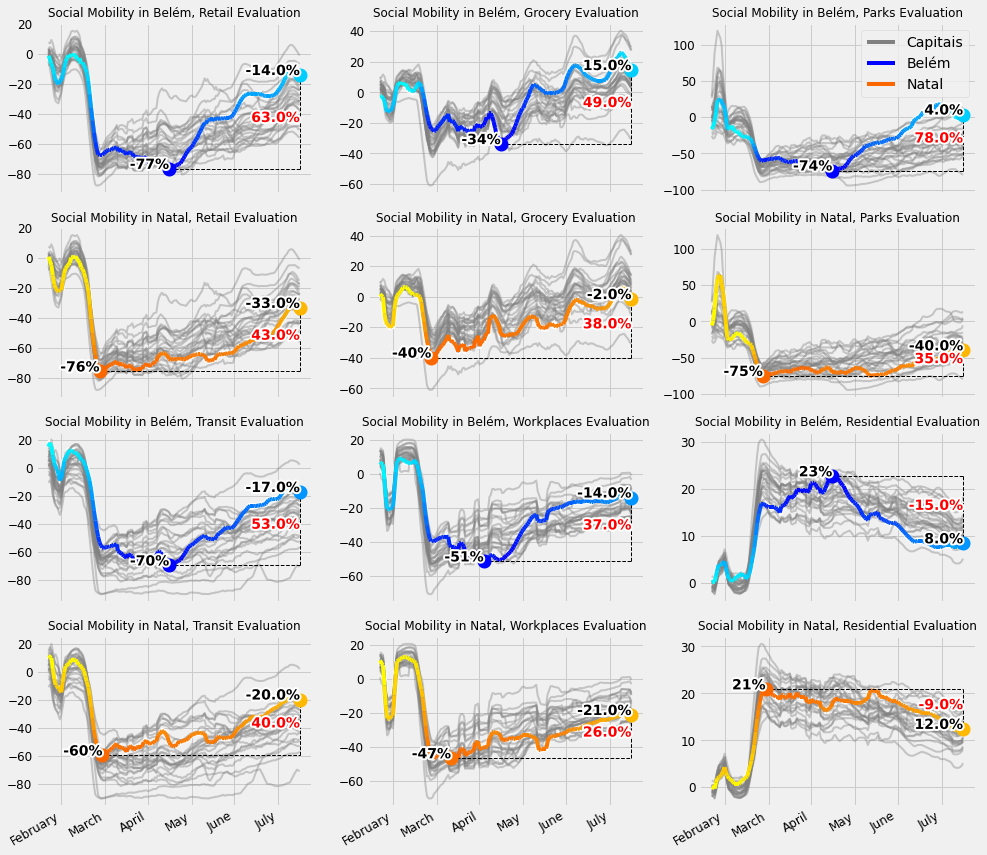

In [59]:
# Create the plot for the graphs
fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(15, 16), sharex=True)

# Create lists with the itens of social mobility and the cities to be analized
itens = capitals.columns[3:]
cities = ["Belém", "Natal"]

# Create a list of colors for Belém and Natal

colors = {
    cities[0]: list(Color("blue").range_to(Color("cyan"), 100)),
    cities[1]: list(Color("#FC6600").range_to(Color("yellow"), 100))
}

# Loop through each subplot
for ii, row in enumerate(ax):
  city = cities[ii%2]   # define the city for the row
  colorMap = []         # reset the color map for the next subplot
  for jj, subplot in enumerate(row):
    item = itens[jj+3*(ii//2)]    # define the item for the suplot
    
    # Get the specific moving averages for the item and then for the city
    # With this, we obtain the moving averages of the means for each window, or the mean of the means
    capitals_windows = movingAverage(capitals_means, 7, False)[item]
    city_windows = capitals_windows[city][6:].copy()
    
    # Find the minimum, maximum and last values
    max = [city_windows.index[np.argmax(city_windows)], np.max(city_windows)]
    min = [city_windows.index[np.argmin(city_windows)], np.min(city_windows)]
    last = [city_windows.tail(1).index[0], city_windows.tail(1)[0]]

    # Check which point we want to highlight
    # For residential, we want the max, for the rest, we want the min
    if item == "Residential":
      highlight = max
    else:
      highlight = min

    # Plot a whiteline as a baseguide for the gradient
    subplot.plot(city_windows, color="white", linewidth=6, zorder=1)

    # Normalize the values
    normalized = [(value - min[1])/(max[1] - min[1]) for value in city_windows]

    #generate color range for the entrys
    for value in normalized:
        colorMap.append(colors[city][np.abs(int((100*value)) - 1)].hex)

    # Plot the gradient line
    for kk in range(0, city_windows.count() - 1):
      x = [city_windows.index[kk], city_windows.index[kk+1]]
      y = [city_windows[kk], city_windows[kk+1]]
      subplot.plot(x, y, colorMap[kk], linewidth=4, zorder=2)

      # Mark the highlight and last values with a dot
      if [x[0], y[0]] == highlight:
        subplot.scatter(x[0],y[0],marker='o',alpha=1,color=colorMap[kk],linewidth=8,zorder=3)
      if [x[1], y[1]] == last:
        subplot.scatter(x[1],y[1],marker='o',alpha=1,color=colorMap[kk],linewidth=8,zorder=3)

    # Plot grey lines for every capital
    capitals_windows.plot(ax=subplot, color="grey", linewidth=2, alpha=0.4, legend=False, zorder=1)
    
    # Show the value for the highlight and last points
    path = [PathEffects.withStroke(linewidth=4, foreground='w')]
    subplot.annotate(str(round(highlight[1])) + "%", xy=(highlight[0], highlight[1]), color="black", weight="bold", ha="right", path_effects=path, zorder=5)
    subplot.annotate(str(round(last[1])) + "%",xy=(last[0], last[1]), color="black", weight="bold", ha="right", path_effects=path, zorder=5)

    # Mark the difference between highlight and last values
    subplot.plot([highlight[0], last[0]], [highlight[1], highlight[1]], color="black", linestyle="--", linewidth=1)
    subplot.plot([last[0], last[0]], [highlight[1], last[1]], color="black", linestyle="--", linewidth=1)
    subplot.annotate(str(round(last[1]) - round(highlight[1])) + "%", xy=(last[0], (highlight[1] + last[1])/2),color='red', weight="bold", ha="right", path_effects=path,zorder=5)

    # Create the legend
    if ii == 0 and jj == 2:
      capitals_legend = mlines.Line2D([], [],color="grey", label="Capitais")
      belem_legend = mlines.Line2D([], [], color=colors[cities[0]][0].hex, label=cities[0])
      natal_legend = mlines.Line2D([], [], color=colors[cities[1]][0].hex, label=cities[1])
      subplot.legend(handles=[capitals_legend, belem_legend, natal_legend],loc="upper right",ncol=1)

    # Define plot legend and title
    subplot.set_xticklabels(["February", "March", "April", "May", "June", "July", "August"],fontsize=12)
    subplot.yaxis.set_tick_params(labelsize=12)
    subplot.set_title("Social Mobility in {}, {} Evaluation".format(city, item),fontsize=12)
    subplot.set_xlabel("")
plt.savefig("1FP #01.png",dpi=250) 
plt.show()